<a href="https://colab.research.google.com/github/RTae/CPE213/blob/main/week4/script/CPE213_Lecture_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
bankData <- read.csv('/content/bank-data.csv', sep=';')

# Import data

In [3]:
bankData

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


In [7]:
summary(bankData)

      age            job              marital           education        
 Min.   :18.00   Length:45211       Length:45211       Length:45211      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.94                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
   default             balance         housing              loan          
 Length:45211       Min.   : -8019   Length:45211       Length:45211      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   448   Mode  :character   Mode  :character  
                    Mean   :  1362                                        
                    3rd Qu.:  1428                                        
                    Max.   :1021

In [6]:
summary(factor(bankData$contact))

cellular telephone   unknown 
    29285      2906     13020

In [8]:
bankData %>%
  group_by(job) %>%
  summarise(n = n()) %>%
  arrange(desc(n))

job,n
<chr>,<int>
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


# Contigenfy Table (Cross- tabular)

In [15]:
bankData %>%
  group_by(marital, education) %>%
  summarise(n=n()) %>%
  pivot_wider(names_from = marital, values_from = n)

`summarise()` has grouped output by 'marital'. You can override using the `.groups` argument.



education,divorced,married,single
<chr>,<int>,<int>,<int>
primary,752,5246,853
secondary,2815,13770,6617
tertiary,1471,7038,4792
unknown,169,1160,528


In [18]:
bankData %>%
  group_by(marital, education) %>%
  summarise(n=n()) %>%
  pivot_wider(names_from = marital, values_from = n)

`summarise()` has grouped output by 'marital'. You can override using the `.groups` argument.



education,divorced,married,single
<chr>,<int>,<int>,<int>
primary,752,5246,853
secondary,2815,13770,6617
tertiary,1471,7038,4792
unknown,169,1160,528


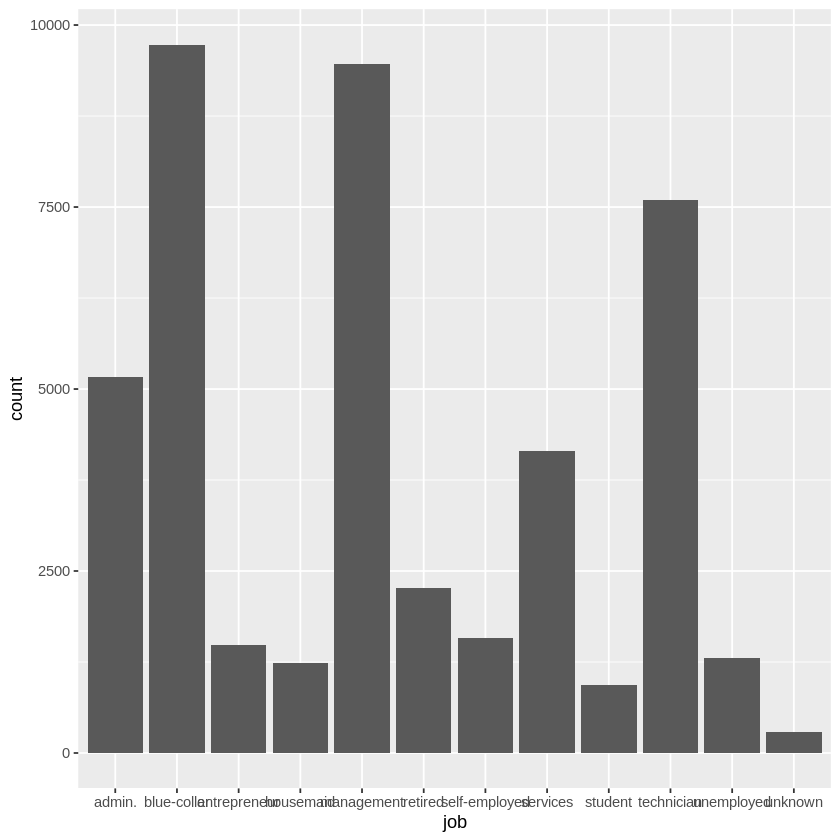

In [19]:
ggplot(bankData, aes(job)) + 
  geom_bar()

In [27]:
brk <- c(0, 20, 30, 40, 50, 60, 100)
h <- hist(bankData$age, breaks=brk, plot=F)
freq_table <- data.frame(bin = h$breaks[-1], counts = h$counts)

# Effects of Histogram bin

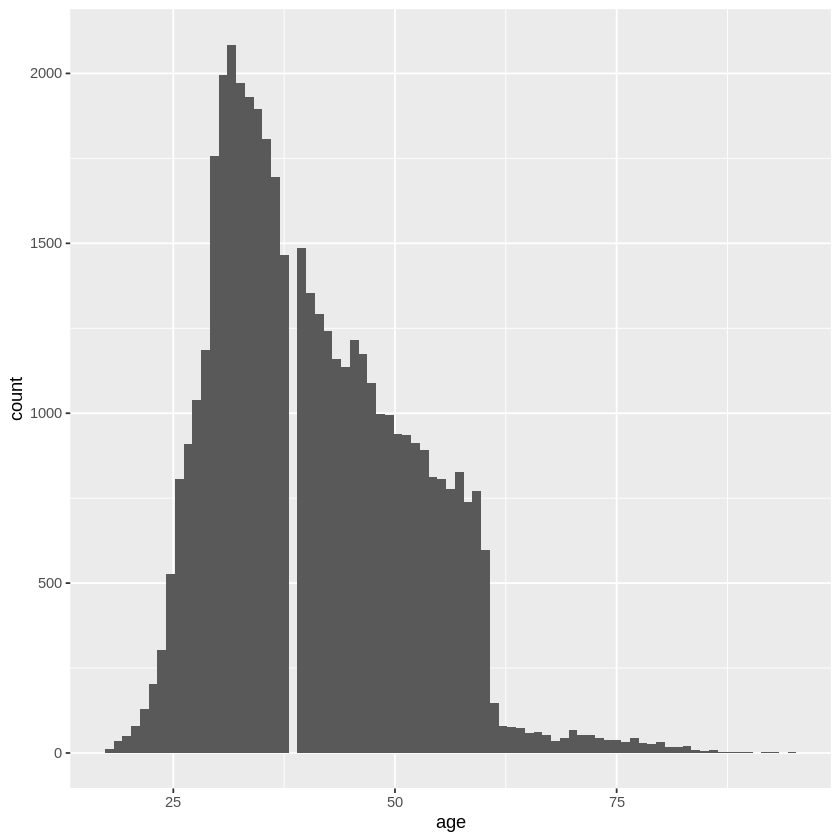

In [40]:
ggplot(bankData, aes(age), color='white') + 
  geom_histogram(bins=79) 

# Effects of number of samples

Warning message:
“Ignoring unknown parameters: bin”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



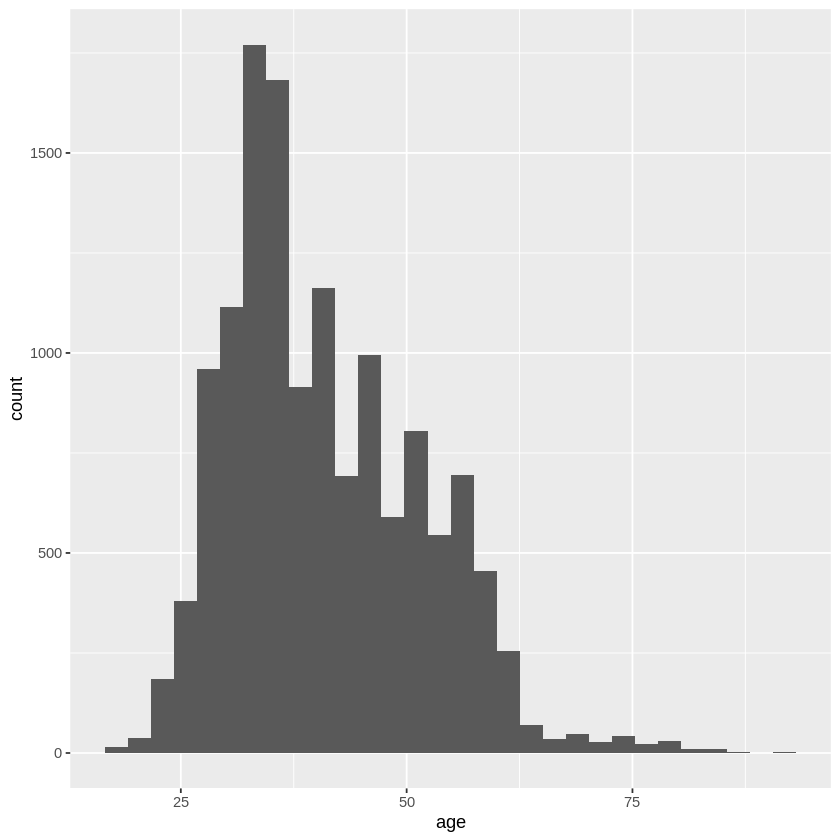

In [47]:
bankData %>%
  sample_frac(0.3) %>%
  ggplot(aes(age)) + 
  geom_histogram(bin=20)

Warning message:
“Ignoring unknown parameters: bin”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



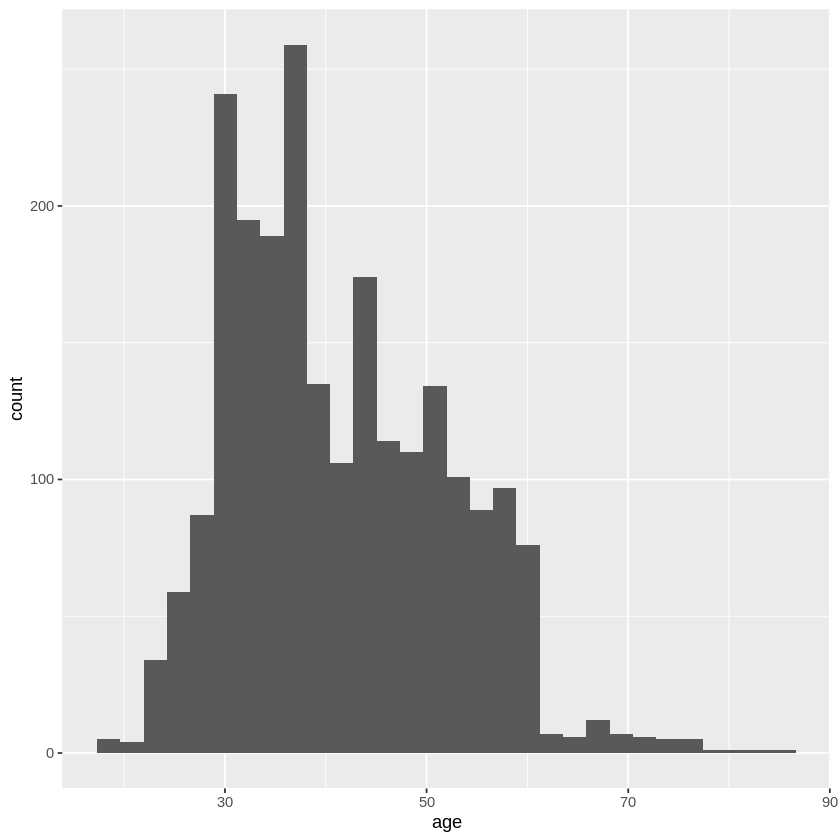

In [50]:
bankData %>%
  sample_frac(0.05) %>%
  ggplot(aes(age)) + 
  geom_histogram(bin=20)

# Boxplot

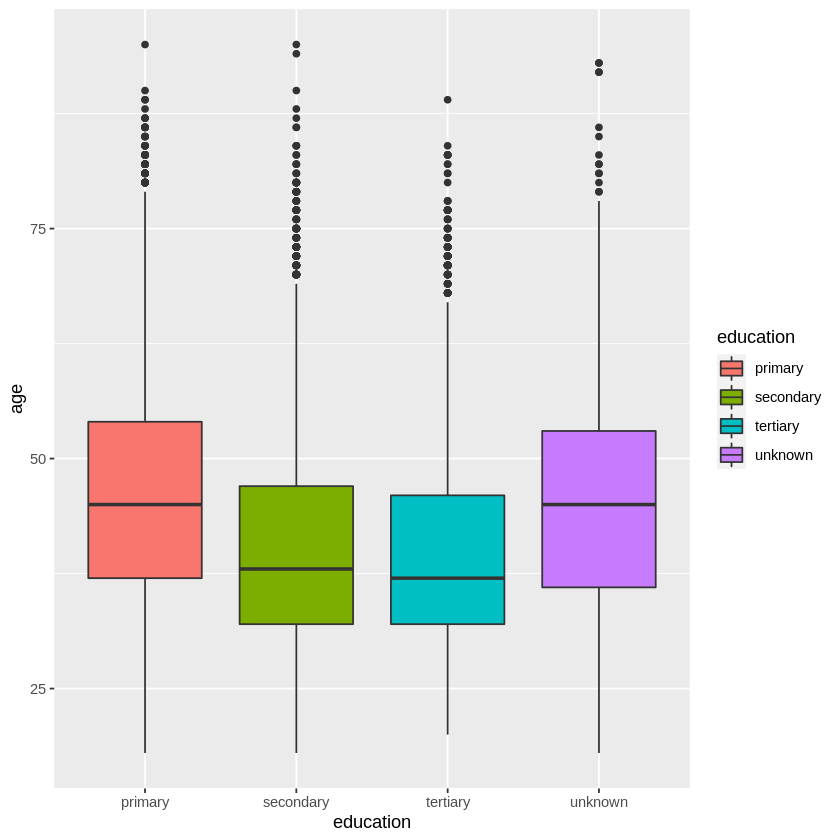

In [54]:
bankData %>%
  ggplot(aes(education, age, , fill = education)) + 
  geom_boxplot()